## 1.b Newton's Method 
Data files:    
• http://cs229.stanford.edu/ps/ps1/logistic_x.txt     
• http://cs229.stanford.edu/ps/ps1/logistic_y.txt

These files contain the inputs (x(i) ∈ R2) and outputs (y(i) ∈ {−1,1}), respectively for a
binary classification problem, with one training example per row. Implement2 Newton’s
method for optimizing J(θ), and apply it to fit a logistic regression model to the data. ⃗
Initialize Newton’s method with θ = 0 (the vector of all zeros). What are the coefficients θ resulting from your fit? (Remember to include the intercept term.)

In [89]:
import sys
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

%matplotlib inline

In [90]:
!head data/logistic_x.txt

   1.3432504e+00  -1.3311479e+00
   1.8205529e+00  -6.3466810e-01
   9.8632067e-01  -1.8885762e+00
   1.9443734e+00  -1.6354520e+00
   9.7673352e-01  -1.3533151e+00
   1.9458584e+00  -2.0443278e+00
   2.1075153e+00  -2.1256684e+00
   2.0703730e+00  -2.4634101e+00
   8.6864964e-01  -2.4119348e+00
   1.8006594e+00  -2.7739689e+00


In [91]:
!head data/logistic_y.txt

   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00
   -1.0000000e+00


In [92]:
# Reading input and label

features = np.genfromtxt('data/logistic_x.txt', delimiter='', dtype='float')
label = np.genfromtxt('data/logistic_y.txt', delimiter='', dtype='float')

features = np.insert(features, 0, values=1, axis=1)
label = np.reshape(label, (label.shape[0], 1))

In [93]:
print(features.shape)
print(label.shape)


(99, 3)
(99, 1)


In [94]:
def get_hypothesis(theta, features, y):
    #theta : N*1, features : M X N
    x_theta = np.matmul(features, theta)
    y_x = np.multiply(y, x_theta)
    h_x = 1/(1+ np.exp(-y_x)) #M*1
    return h_x 

                  
def get_loss(y, features, theta, eps=1e-10):
    #features: M*N, theta: N*1, y: M*1 
    x_theta = np.matmul(features, theta)
    y_x = np.multiply(y, x_theta)
    loss = np.log(1 + (np.exp(-y_x)))
    loss = np.mean(loss)
    return loss
             

def get_gradient(y, h_x, features):
    # y : M*1, h_x = M*1, features = M*N
    prediction = h_x - 1  #[M*1]
    prediction = np.multiply(prediction, y)
    gradient = np.matmul(np.transpose(prediction), features) #[1XN]
    return np.transpose(gradient) # N*1


def get_hessian(features, h_x):
    # features : M*N, h_x: M*1
    M = features.shape[0]
    diagonal_matrix = np.zeros((M , M))
    diagonal_values = np.multiply(h_x, (1-h_x)) # M * 1
    np.fill_diagonal(diagonal_matrix, diagonal_values) 
    hessian = np.matmul(np.transpose(features), diagonal_matrix) # [N*M] * [M*M] = N*M
    hessian = np.matmul(hessian, features) # [N*M] * [M*N] = [N*N]
    return hessian



In [95]:
#Main function

old_theta = None
eps = 1e-4
theta = np.zeros((np.shape(features)[1],1)) #N*1 : 3*1 

while True:
    h_x = get_hypothesis(theta, features, label) #M*1
    gradient = get_gradient(label, h_x, features) #N*1
    hessian = get_hessian(features, h_x) + eps #N*N
    
    theta = theta - np.matmul(np.linalg.inv(hessian), gradient) # N*1 = N*1 - [(N*N)*(N*1)]
    
    h_x = get_hypothesis(theta, features, label) #M*1 New Hypothesis
    loss = get_loss(label, features, theta)
    
    if old_theta is not None and np.sum(np.abs(theta - old_theta)) < eps:
        break
    old_theta = theta
    
print("Final set of coefficients : ", theta)

Final set of coefficients :  [[-2.6205116 ]
 [ 0.76037154]
 [ 1.17194674]]


## 1. (c) Plotting the decision boundary:

Plot the training data (your axes should be x1 and x2, corresponding to the two coordinates of the inputs, and you should use a different symbol for each point plotted to indicate whether that example had label 1 or -1). Also plot on the same figure the decision boundary fit by logistic regression. (This should be a straight line showing the boundary separating the region where hθ(x) > 0.5 from where hθ(x) ≤ 0.5.)

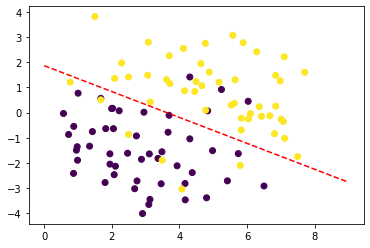

In [96]:
x1 = features[:, 1]
x2 = features[:, 2]
line_x = np.linspace(min(x), max(x), num=10) #selecting 10 random numbers equally spaced between min and max
line_y = np.linspace(min(y), max(y), num=10)

line = (theta[0] + theta[1] * line_x) / (-theta[2]) 

plt.scatter(x1, x2, c=label[:,0].tolist())
plt.plot(line, '--', c="red")
plt.show()